# Investigacion Corta 2

Comparacion de 6 metodos supervisados de Machine Learning

Cada metodo abajo esta numerado y explicado 

# ACERCA DEL DATASET

HTRU es un conjunto de datos que describe una muestra de los candidatos de púlsares recopilados
durante la Encuesta del Universo de Resolución de Tiempo Alto.

Los púlsares son un tipo raro de estrella de neutrones que producen emisiones de radio 
detectables aquí en la Tierra. 
Son de considerable interés científico como sondas del espacio-tiempo, 
el medio inter-estelar y los estados de la materia.

A medida que los púlsares giran, su haz de emisión recorre el cielo y, cuando esto cruza 
nuestra línea de visión, produce un patrón detectable de emisión de radio de banda ancha. 
Como los pulsares giran rápidamente, este patrón se repite periódicamente. Por lo tanto,
la búsqueda de púlsares implica buscar señales de radio periódicas con radiotelescopios grandes.

Cada púlsar produce un patrón de emisión ligeramente diferente, que varía ligeramente 
con cada rotación. Por lo tanto, una detección de señal potencial conocida como "candidato" 
se promedia a lo largo de muchas rotaciones del pulsar, según lo determinado por la longitud 
de una observación. En ausencia de información adicional, cada candidato podría potencialmente
describir un pulsar real. Sin embargo, en la práctica, casi todas las detecciones son 
causadas por interferencias de radiofrecuencia (RFI) y ruido, lo que hace que las señales 
legítimas sean difíciles de encontrar.

Las herramientas de aprendizaje automático ahora se están utilizando para etiquetar 
automáticamente los candidatos a pulsar para facilitar un análisis rápido. 
Los sistemas de clasificación en particular están siendo ampliamente adoptados. 
Aquí, los ejemplos legítimos de púlsares son una clase minoritaria positiva, 
y los ejemplos espurios la mayoría de clase negativa. 

Actualmente, las etiquetas de múltiples clases no están disponibles, 
dados los costos asociados con la anotación de datos.

El conjunto de datos compartido aquí contiene 16,259 ejemplos falsos causados ​​por RFI / ruido
y 1,639 ejemplos de púlsares reales. 

Todos estos ejemplos han sido verificados por anotadores humanos.

Los candidatos se almacenan en filas separadas. Cada fila enumera las variables primero, 
y la etiqueta de la clase es la entrada final. 

Las etiquetas de clase utilizadas son 0 (negativa) y 1 (positiva).

Tenga en cuenta que los datos no contienen información posicional u otros detalles astronómicos. 

Información del atributo:

Cada candidato se describe mediante 8 variables continuas y una variable de clase única. Los primeros cuatro son estadísticas simples obtenidas del perfil de pulso integrado (perfil plegado). Esta es una matriz de variables continuas que describen una versión con resolución de longitud de la señal que se ha promediado tanto en tiempo como en frecuencia. Las cuatro variables restantes se obtienen de manera similar a partir de la curva DM-SNR. Estos se resumen a continuación:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class 

# Preprocesamiento de los Datos de Entrada

In [1]:
# Importar las librerias

import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#Importar los Datos

df = pd.read_csv('HTRU.csv')

In [3]:
# Previsualizar las primeras 5 lineas del Dataset

df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
# Estadisticas numericas del Dataset

df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [5]:
#Mostrar numero de filas y columnas del Dataset
df.shape

(17898, 9)

In [6]:
# Creacion de Lista solo de Atributos

features = ['Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve']




In [7]:
# Separar los atributos de las clases

input_features = df.loc[:,features].values
output_class = df.loc[:,['Class']].values

# Reducir la salidad a una sola columna
output_class = output_class.ravel()

In [8]:
# Separar los datos en datos de prueba y datos de entrenamiento
# test_size=0.25 indica que del archivo original tomaremos el 25% del archivo que sera creado
# como el archivo de prueba

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_features,output_class, test_size=0.25, random_state=60)

# 1. KNN (K Nearest Neighbours)

La idea es realmente sencilla: el algoritmo clasifica cada dato nuevo en el grupo que corresponda, según tenga k vecinos más cerca de un grupo o de otro. Es decir, calcula la distancia del elemento nuevo a cada uno de los existentes, y ordena dichas distancias de menor a mayor para ir seleccionando el grupo al que pertenecer. Este grupo será, por tanto, el de mayor frecuencia con menores distancias.

El K-NN es un algoritmo de aprendizaje supervisado, es decir, que a partir de un juego de datos inicial su objetivo será el de clasificar correctamente todas las instancias nuevas. El juego de datos típico de este tipo de algoritmos está formado por varios atributos descriptivos y un solo atributo objetivo (también llamado clase)[5]

Pseudo Code de KNN

Los pasos para aplicar el codigo KNN los podemos describir como siguen:

1. Cargar los datos.
2. Inicializar el valor de k
3. Para obtener la clase predecida, repita de 1 a la cantidad total de puntos de datos de entrenamiento
4. Calcule la distancia entre los datos de prueba y cada fila de datos de entrenamiento. 
    Aquí utilizaremos la distancia euclidiana como nuestra métrica de distancia, 
    ya que es el método más popular. Las otras métricas que se pueden utilizar son 
    Chebyshev, coseno, etc.
5. Ordene las distancias calculadas en orden ascendente en función de los valores de distancia
6. Obtener las filas k superiores de la matriz ordenada
7. Consigue la clase más frecuente de estas filas.
8. Devuelve la clase predecida


In [9]:
from sklearn import neighbors
# Generacion del KNN
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)

# Crear Modelo
knn_modelo = knn.fit(x_train, y_train)

# Imprimir Resultados de exactitud
print('Training Score: %f' % knn_modelo.score(x_train,y_train))
print('Test Score:  %f' % knn_modelo.score(x_test, y_test))



Training Score: 0.981226
Test Score:  0.968939


In [10]:
from sklearn.metrics import classification_report

y_true, y_pred = y_train, knn_modelo.predict(x_train)
print(classification_report(y_true, y_pred))

y_true, y_pred = y_test, knn_modelo.predict(x_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12202
           1       0.94      0.85      0.89      1221

   micro avg       0.98      0.98      0.98     13423
   macro avg       0.96      0.92      0.94     13423
weighted avg       0.98      0.98      0.98     13423

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4057
           1       0.89      0.77      0.82       418

   micro avg       0.97      0.97      0.97      4475
   macro avg       0.93      0.88      0.90      4475
weighted avg       0.97      0.97      0.97      4475



In [12]:
from sklearn.neighbors import KNeighborsClassifier
exactitud_training = []
exactitud_test = []
k_range = range(1, 40)
for n_neighbors in k_range:

    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    exactitud_training.append(clf.score(x_train, y_train))
    exactitud_test.append(clf.score(x_test, y_test))


Text(0, 0.5, 'Exactitud del Testing set')

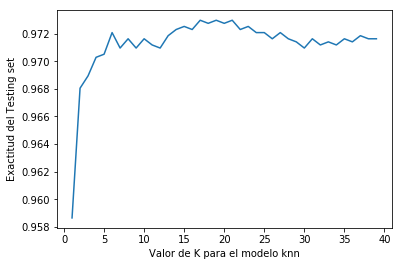

In [13]:
%matplotlib inline

# Graficamos la relacion entre el numero K y la exactitud de testing
# plt.plot(x_axis, y_axis)
plt.plot(k_range, exactitud_test)
plt.xlabel('Valor de K para el modelo knn')
plt.ylabel('Exactitud del Testing set')

Text(0, 0.5, 'Exactitud del Training set')

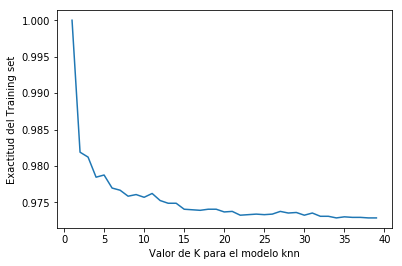

In [14]:
%matplotlib inline

# Graficamos la relacion entre el numero K y la exactitud de training
# plt.plot(x_axis, y_axis)
plt.plot(k_range, exactitud_training)
plt.xlabel('Valor de K para el modelo knn')
plt.ylabel('Exactitud del Training set')

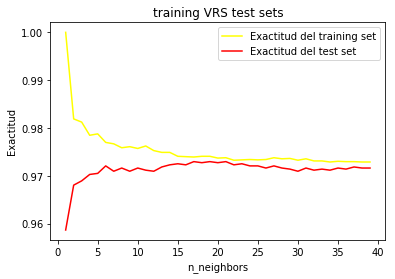

In [15]:
# Graficar Resultados
plt.plot(k_range, exactitud_training, label="Exactitud del training set", color='yellow')
plt.plot(k_range, exactitud_test, label="Exactitud del test set", color='red')
plt.ylabel("Exactitud")
plt.xlabel("n_neighbors")
plt.title("training VRS test sets")
plt.legend()



# SVM (Máquinas de vectores de soporte)

Estos métodos están propiamente relacionados con problemas de clasificación y regresión. Dado un conjunto de ejemplos de entrenamiento (de muestras) podemos etiquetar las clases y entrenar una SVM para construir un modelo que prediga la clase de una nueva muestra. Intuitivamente, una SVM es un modelo que representa a los puntos de muestra en el espacio, separando las clases a 2 espacios lo más amplios posibles mediante un hiperplano de separación definido como el vector entre los 2 puntos, de las 2 clases, más cercanos al que se llama vector soporte [2]

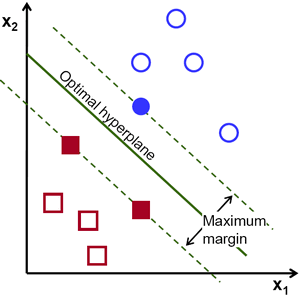

La Máquina de vectores de soporte se puede ver como máquinas de Kernel. Como resultado, puede cambiar su comportamiento utilizando una función de kernel diferente [4]

Las funciones más populares del kernel son:

    the linear kernel
    the polynomial kernel
    the RBF (Gaussian) kernel
    the string kernel


In [25]:
#Linear Kernel
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))

[[4038   19]
 [  86  332]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4057
           1       0.95      0.79      0.86       418

   micro avg       0.98      0.98      0.98      4475
   macro avg       0.96      0.89      0.93      4475
weighted avg       0.98      0.98      0.98      4475

Exactitud: 0.976536312849162


# 3. DECISION TREE (ARBOLES DE DECISION)

Usando la libreria sklearn.tree, podemos usar DecisionTreeClassifier para crear nuestro arbol de decision.
Podemos usar todos los parametros y atributos a continuacion:

DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

Una descripcion de estos parametros y atributos puede ser encontrada en: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [16]:
#En este ejemplo usaremos los parametros max_depth y random_state
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=3, random_state=2)
decision_tree.fit(x_train, y_train)

print("Training Score: {:.9f}".format(decision_tree.score(x_train,y_train)))
print("Test Score: {:.9f}".format(decision_tree.score(x_test,y_test)))

Training Score: 0.980555762
Test Score: 0.976536313


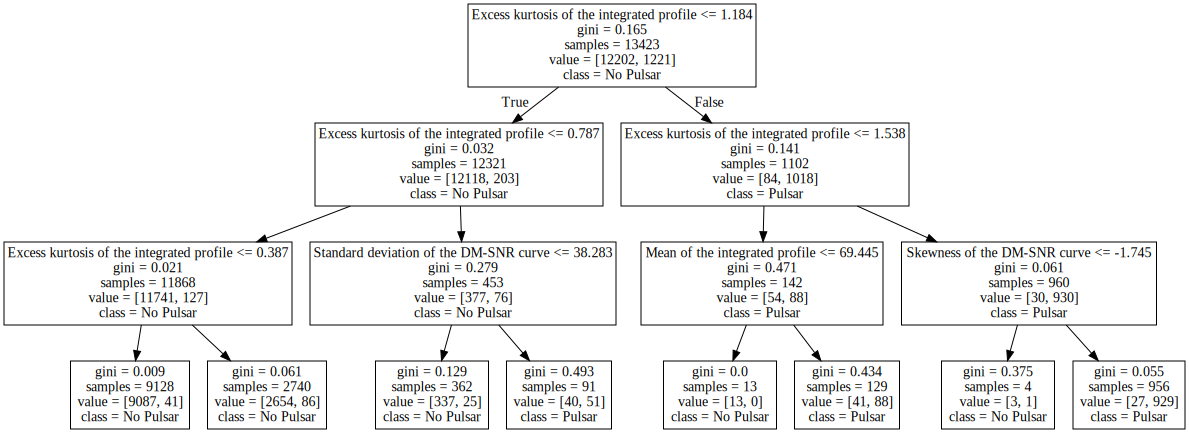

In [22]:
#graficaremos el Arbol usando graphviz

import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(decision_tree, out_file=None)
graph = graphviz.Source(dot_data) 

dot_data = tree.export_graphviz(decision_tree, \
                                out_file=None,
                               feature_names = features,\
                               class_names = ["No Pulsar", "Pulsar"],\
                               label = 'all') 
graph = graphviz.Source(dot_data)  
graph

# 4. Regresion Lineal

A continuacion describiremos este metodo como lo hace la referencia [6]

La regresión es una forma estadística de establecer una relación entre una variable dependiente y un conjunto de variables independientes.

Es un enfoque muy simple para el aprendizaje supervisado. Aunque puede parecer algo aburrido en comparación con algunos de los algoritmos más modernos, este algoritmo sigue siendo un método de aprendizaje estadístico útil y ampliamente utilizado.

La regresión lineal o linear regression es un método para predecir la variable dependiente (y) en función de los valores de las variables independientes (X). Se puede usar para los casos donde queremos predecir alguna cantidad continua

Variables independientes (características): es una variable que se manipula para determinar el valor de una variable dependiente. Simplemente, son las características que queremos usar para predecir algún valor dado de y.

Variable dependiente (objetivo): la variable dependiente depende de los valores de la variable independiente. En pocas palabras, es la característica que estamos tratando de predecir. Esto también se puede conocer comúnmente como una variable de respuesta.

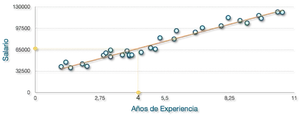

Aprendizaje Supervisado: Linear RegressionEste algoritmo consiste en hallar una línea recta que mejor encaje en un conjunto de datos dados, este conjunto de datos comprende las variables independientes e dependiente. Para esto podremos utilizar métodos matemáticos como el de los mínimos cuadrados, para buscar minimizar la distancia vertical de todos los puntos a la línea recta.

Una vez obtenida esta línea recta, seremos capaces de hacer predicciones hipotéticas sobre cuál será el valor de “y” dado “X”.

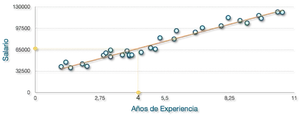

Aprendizaje Supervisado: Linear Regression

Para ajustar una línea de regresión lineal, los datos deben satisfacer algunas suposiciones básicas pero importantes, si sus datos no siguen los suposiciones, sus resultados pueden ser incorrectos y engañosos


In [23]:
from sklearn import datasets, linear_model

# Modelo Lineal
lm = linear_model.LinearRegression()

# Fit the model using x_train as training data and y_train as target values
model = lm.fit(x_train, y_train)

# Predict the output with the test set as input
predicciones = lm.predict(x_test)
print ("Training Score:", model.score(x_train, y_train))
print ("Test Score:", model.score(x_test, y_test))

Training Score: 0.6878553037384595
Test Score: 0.6687464902489617


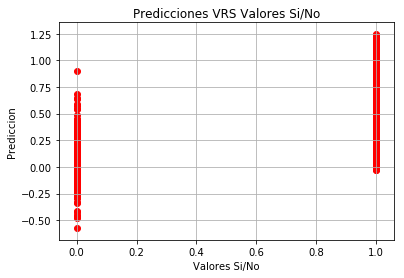

In [24]:
# Graficar los Resultados

plt.scatter(y_test, predicciones, color='red')
plt.xlabel("Valores Si/No")
plt.ylabel("Prediccion")
plt.title("Predicciones VRS Valores Si/No")
plt.grid(b=1)
plt.show()

#Note que los valores son discretos, es Pulsar o No Pulsar, por lo que no tendremos una linea recta graficada en este caso

# BOOSTING ALGORITHMS (ENSAMBLE)

El impulso de los algoritmos de conjunto crea una secuencia de modelos que intentan corregir los errores de los modelos anteriores a ellos en la secuencia.

Una vez creados, los modelos hacen predicciones que pueden ser ponderadas por su precisión demostrada y los resultados se combinan para crear una predicción de salida final.

Los dos algoritmos de aprendizaje automático por conjuntos más comunes son:

    1. AdaBoost
    2. Stochastic Gradient Boosting [3]

# 5. Stochastic Gradient Boosting

El aumento de gradiente estocástico (también llamado máquinas de aumento de gradiente) es una de las técnicas de conjunto más sofisticadas. También es una técnica que está demostrando ser tal vez una de las mejores técnicas disponibles para mejorar el rendimiento a través de conjuntos.

Puede construir un modelo de Gradient Boosting para la clasificación utilizando la clase GradientBoostingClassifier.

El siguiente ejemplo muestra el aumento de gradiente estocástico para la clasificación con 100 árboles[3]

In [20]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results_train = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)
results_test = model_selection.cross_val_score(model, x_test, y_test, cv=kfold)
print("Training Score:",results_train.mean())
print("Test Score:",results_test.mean())


Training Score: 0.9792892549877766
Test Score: 0.9727393935762226


# Voting Ensemble

Es una de las formas más simples de combinar las predicciones de múltiples algoritmos de aprendizaje automático.

Funciona creando primero dos o más modelos independientes a partir de su conjunto de datos de entrenamiento. Luego se puede usar un clasificador de votación para envolver sus modelos y promediar las predicciones de los submodelos cuando se le pide que haga predicciones para nuevos datos.

Las predicciones de los submodelos pueden ponderarse, pero es difícil especificar los pesos de los clasificadores de forma manual o incluso heurística. Los métodos más avanzados pueden aprender cómo ponderar mejor las predicciones de los submodelos, pero esto se llama apilado (agregación apilada) y actualmente no se proporciona en scikit-learn.

Puede crear un modelo de conjunto de votación para la clasificación utilizando la clase VotingClassifier.

El siguiente código proporciona un ejemplo de combinación de las predicciones de regresión logística, clasificación y árboles de regresión y máquinas de vectores de soporte para un problema de clasificación [3]

In [21]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

eed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results_train = model_selection.cross_val_score(ensemble, x_train, y_train, cv=kfold)
results_test = model_selection.cross_val_score(ensemble, x_test, y_test, cv=kfold)
 
print("Training Score:",results_train.mean())
print("Test Score:",results_test.mean())


/home/guille/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/guille/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/guille/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/guille/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gam

/home/guille/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/guille/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/guille/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/guille/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gam

Training Score: 0.9775756170150907
Test Score: 0.972966602748482


# Conclusiones

Podemos ver que cada metodo tiene sus ventajas y desventajas.
Con la regresion Lineal tuvimos los peores resultados, esto se debe a que es un metodo que se ajusta muy bien cuando la variable es continua, pero en nuestro ejemplo la clasificacion binaria o discreta no nos permite encontrar una curva o linea de mejor ajuste y por lo tanto el metodo carece de validez.

Algoritmos como SVM son computacionalmente muy costosos y lo notamos al ver que su tiempo de ejecucion es muy lento.

Por otro lado metodos como KNN son faciles de implementar pero sus resultados no son tan buenos como los obtenidos con SVM o el metodo de Stochastic Gradient Boosting o arboles de decision

con el metodo de Stochastic Gradient Boosting podemos notar que la diferencia entre el training set y el test set es la mas pequena en comparacion con todos los otros metodos utilizados.

sklearn es una poderosa libreria, y con los parametros y atributos correctos podemos aumentar la exactitud de nuestro sistema de aprendizaje supervisado

REFERENCIAS

[1] https://archive.ics.uci.edu/ml/datasets/HTRU2

[2] https://es.wikipedia.org/wiki/M%C3%A1quinas_de_vectores_de_soporte

[3] https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

[4] https://www.svm-tutorial.com/2014/10/svm-linear-kernel-good-text-classification/

[5] https://www.analiticaweb.es/algoritmo-knn-modelado-datos/

[6] http://ligdigonzalez.com/aprendizaje-supervisado-linear-regression/
